<a href="https://www.kaggle.com/code/fiftythirtyfour/on-time-performance-usa-2023?scriptVersionId=239002262" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('/kaggle/input/2023-us-civil-flights-delay-meteo-and-aircraft/US_flights_2023.csv')

df.columns = df.columns.str.lower()
num = df.select_dtypes(include='number').columns.to_list()
cat = df.select_dtypes(include='object').columns.to_list()

df['dep_otp_15'] = np.where(df['dep_delay'] > 15, 0, 1)
target = 'dep_otp_15'

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2)

# Data Science

In [3]:
df[num].corrwith(df[target]).sort_values(ascending=False)

aicraft_age          -0.007045
day_of_week          -0.027177
delay_security       -0.035377
flight_duration      -0.041338
delay_weather        -0.101854
delay_nas            -0.184385
delay_carrier        -0.272477
delay_lastaircraft   -0.370870
arr_delay            -0.522125
dep_delay            -0.534136
dep_delay_tag        -0.635566
dtype: float64

In [4]:
cat

['flightdate',
 'airline',
 'tail_number',
 'dep_airport',
 'dep_cityname',
 'deptime_label',
 'dep_delay_type',
 'arr_airport',
 'arr_cityname',
 'arr_delay_type',
 'distance_type',
 'manufacturer',
 'model']

# Machine

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [6]:
num = ['delay_lastaircraft']
cat = ['airline']
processor = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), num)
    , (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat)
)

processor.fit(train)
train_pre = processor.transform(train)

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
log = LogisticRegression(max_iter=1000)
log.fit(train_pre, train[target])
print(cross_val_score(log, train_pre, train[target], scoring='accuracy').mean())

0.8905823339280774


In [10]:
model = log
pipe = make_pipeline(processor, model)

# Residuals

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.96      0.47      0.63    267033
           1       0.88      0.99      0.94   1081648

    accuracy                           0.89   1348681
   macro avg       0.92      0.73      0.78   1348681
weighted avg       0.90      0.89      0.88   1348681



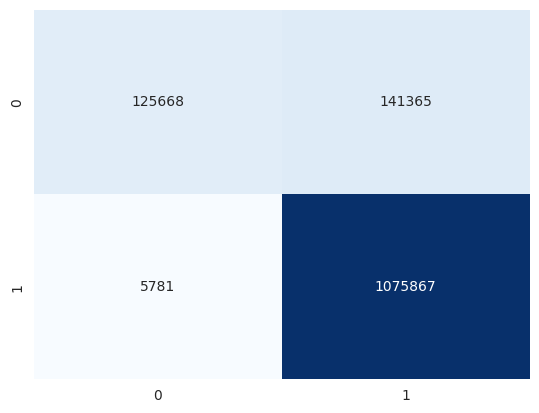

In [12]:
preds = pipe.predict(test)
print(classification_report(test[target], preds))
sns.heatmap(confusion_matrix(test[target], preds), annot=True, fmt='.0f', cbar=False, cmap='Blues');